In [1]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import numpy as np

import sys
sys.path.append("..")
from models import Composite

In [2]:
x_train = np.load("X-1647041985-early-fusion-vectors-train.arr")
y_train = np.load("y-1647041985-train.arr")

x_test = x_train # np.load("")
y_test = y_train # np.load("")

## Different late fusion networks

In [3]:
def fit_then_print_and_plot_roc(models, x_trains, y_train, x_tests, y_test):
    probs = {}
    for model in models:
        models[model].fit(x_trains[model], y_train)
        probs[model] = models[model].predict_proba(x_tests[model])[:,1]
        print(f"ROC AUC score for {model}: {roc_auc_score(y_test, probs[model])}")

    model = "No Skill"
    most_common_label = np.argmax(np.bincount(y_test.astype(int)))
    probs[model] = np.array([most_common_label for _ in range(len(y_test))], dtype=int)
        
    plt.figure(figsize=(14,6))
    for model in probs:
        fpr, tpr, _ = roc_curve(y_test, probs[model])
        # plot the roc curve for the model
        linestyle = "--" if model == "No Skill" else "solid"
        plt.plot(fpr, tpr, linestyle=linestyle, label=model)
        # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    _ = plt.legend()

In [4]:
models = {}
modules = ["malconv", "ember", "filepaths", "emulation"]

models["Logistic Regression"] = Composite(modules=modules, late_fusion_model="LogisticRegression")
models["XGBVClassifier"] = Composite(modules=modules, late_fusion_model="LogisticRegression")
models["Multi-Layer Perceptron"] = Composite(modules=modules, late_fusion_model="MLP")

x_trains = dict([(model, x_train) for model in models])
x_tests = dict([(model, x_test) for model in models])

ROC AUC score for Logistic Regression: 0.9999940969303497
ROC AUC score for XGBVClassifier: 0.9999940969303497
ROC AUC score for Multi-Layer Perceptron: 0.9999946158815278


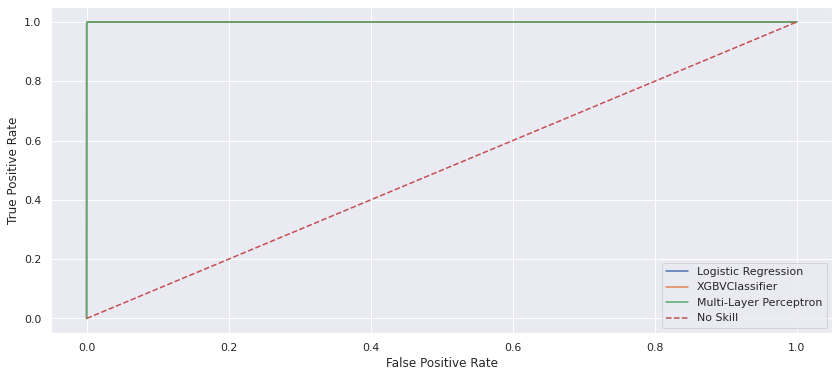

In [5]:
fit_then_print_and_plot_roc(models, x_trains, y_train, x_tests, y_test)

## Different modules

In [6]:
modulelist = [["malconv"], ["ember"], ["filepaths"], ["emulation"], 
            ["malconv", "ember", "filepaths", "emulation"]]
models = {}
x_trains = {}
x_tests = {}
for modules in modulelist:
    name = "_".join(modules)
    if len(modules) == 4:
        name = "All"
    models[name] = Composite(modules=modules, late_fusion_model="LogisticRegression")
    x_trains[name] = models[name].get_cropped_x(modules, x_train)
    x_tests[name] = models[name].get_cropped_x(modules, x_test)

ROC AUC score for malconv: 0.6705477663652653
ROC AUC score for ember: 0.9864089055594645
ROC AUC score for filepaths: 0.9999358888466745
ROC AUC score for emulation: 0.9920671552908518
ROC AUC score for All: 0.9999940969303497


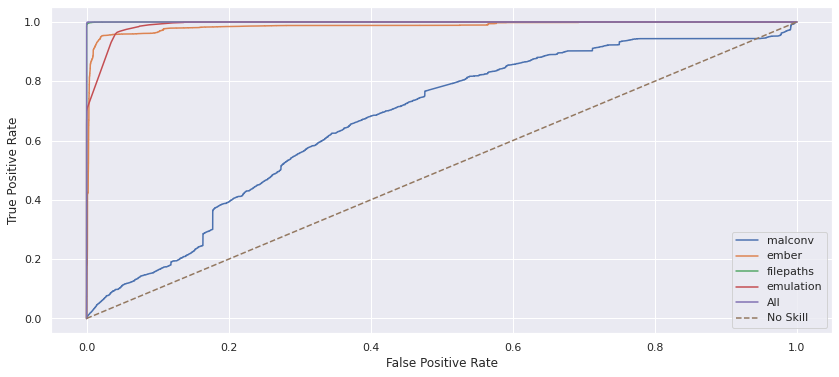

In [7]:
fit_then_print_and_plot_roc(models, x_trains, y_train, x_tests, y_test)